In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import paynet

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['^', 'o', 'v', 'd', 's'] 

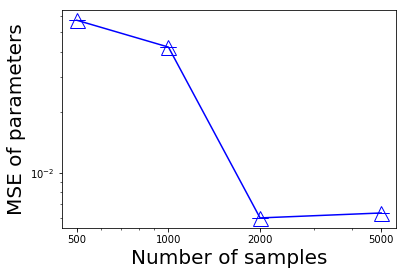

In [2]:
fname_v = './results/rps/rps1_weights_big%d' # <--- Change this if necessary

sizes = [500, 1000, 2000, 5000]
tnames = ['0']
sample_names = ['0']

nplots=0
freq_record = 20
for tname in tnames:
    res = []
    res2 = []
    for size in sizes:
        sampled_result = []
        sampled_result2 = []
        for sample_name in sample_names:
            full = os.path.join(fname_v % size, tname + '_' + sample_name) 
            if size == '0': full = os.path.join('./results/rps/longer_rps1_weights_big500', tname + '_' + sample_name) 
            try:
                os.listdir(full)
            except:
                print('%s-%s-%s' %(size, tname, sample_name))
                res.append(float('inf'))
                continue
            all_files = [f for f in os.listdir(full) if os.path.isfile(os.path.join(full, f))]
            
            latest = os.path.join(full, sorted(all_files)[-1])

            with open(latest, 'rb') as f:
                p = pickle.load(f)
                def getstat(p, monitor):                  
                    # For paper
                    # plt.plot(np.array(range(1,101))*freq_record, 
                    #         np.array(p['val_monitor']['vrewards_trend'][0:1000])*100, 
                    #         color='b')
                    # plt.xlabel('Epoch', fontsize=20)
                    # plt.ylabel('MSE of parameters', fontsize=20)
                    
                    mmin=-1
                    return np.mean(p['val_monitor'][monitor][mmin])
            
            # Uncomment the appropriate metric to be plotted
            # sampled_result.append(getstat(p, 'vcardprobstrend'))
            # sampled_result.append(getstat(p, 'vcardprobs_joint_KL_trend'))
            # sampled_result.append(getstat(p, 'payofftrend'))
            sampled_result.append(getstat(p, 'vrewards_trend'))
            sampled_result2.append(getstat(p, 'msetrend'))
            # sampled_result.append(getstat(p, 'loglosstrend'))
            # sampled_result.append(getstat(p, 'msetrend'))
            
        res.append(tuple(sampled_result))
        res2.append(tuple(sampled_result2))
    
    means = [np.mean(x) for x in res]
    stdevs = [np.std(x) for x in res]
    stderr = [stdevs[i]/np.sqrt(len(res[i])) for i in range(len(res))]
    plt.plot(sizes, means, marker=markers[nplots], color=colors[nplots], markersize=15, markerfacecolor="None")
    
    _,caps,_=plt.errorbar(sizes, means , yerr=stderr,
            fmt='o', ecolor=colors[nplots], capsize=8,markersize=0)

    
    nplots+= 1
    for cap in caps:
        cap.set_markeredgewidth(1)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('MSE of parameters', fontsize=20)
plt.xscale('log')
plt.xticks([500, 1000, 2000, 5000],[500, 1000, 2000, 5000])
plt.yscale('log')
plt.title('')

plt.show()
             


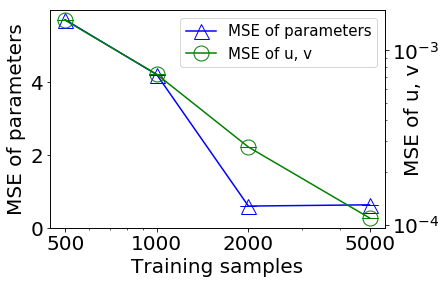

In [3]:
# Code snippet extracted from 
# https://matplotlib.org/2.0.2/examples/api/two_scales.html

plt.rc('ytick',labelsize=20)
plt.rc('xtick',labelsize=20)

# factor of 100 is due to scaling factor of 10 (and *squared* error)
res_scaled= [tuple([x *100 for x in y]) for y in res] 

means = [np.mean(x) for x in res_scaled]
stdevs = [np.std(x) for x in res_scaled]
stderr = [stdevs[i]/np.sqrt(len(res_scaled[i])) for i in range(len(res_scaled))]

nplots = 0
fig, ax1 = plt.subplots()
P1 = ax1.plot(sizes, means, marker=markers[nplots], color=colors[nplots], markersize=15, markerfacecolor="None", label='MSE of parameters')
_,caps,_=ax1.errorbar(sizes, means , yerr=stderr,
            fmt='o', ecolor=colors[nplots], capsize=8,markersize=0)
ax1.set_ylabel('MSE of parameters', fontsize=20)
ax1.set_yticks([0, 2,4])

means = [np.mean(x) for x in res2]
stdevs = [np.std(x) for x in res2]
stderr = [stdevs[i]/np.sqrt(len(res2[i])) for i in range(len(res2))]

nplots = 1

ax2 = ax1.twinx()
P2 = ax2.plot(sizes, means, marker=markers[nplots], color=colors[nplots], markersize=15, markerfacecolor="None", label='MSE of u, v')
ax2.errorbar(sizes, means , yerr=stderr,
            fmt='o', ecolor=colors[nplots], capsize=8,markersize=0)
ax2.set_ylabel('MSE of u, v', fontsize=20, labelpad=-35)
ax2.set_yscale('log')

lns = P1+P2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, fontsize=15)


plt.rc('xtick',labelsize=20)
ax1.set_xlabel('Training samples', fontsize=20)
ax1.set_xscale('log')
plt.xticks([500, 1000, 2000, 5000],[500, 1000, 2000, 5000])

plt.show()

